In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [218]:
#import all the necessary machine learning libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE

## Load the Dataset and Cleaning

In [219]:
coffee = pd.read_csv("df_arabica_clean.csv")

In [220]:
coffee.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [221]:
coffee.shape

(207, 41)

In [222]:
coffee.dtypes

Unnamed: 0                 int64
ID                         int64
Country of Origin         object
Farm Name                 object
Lot Number                object
Mill                      object
ICO Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number of Bags             int64
Bag Weight                object
In-Country Partner        object
Harvest Year              object
Grading Date              object
Owner                     object
Variety                   object
Status                    object
Processing Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean Cup                float64
Sweetness                float64
Overall                  float64
Defects   

In [223]:
null_values = (coffee.isnull().sum() / len(coffee))*100
null_values = null_values.drop(null_values[null_values == 0].index)

In [224]:
null_values = pd.DataFrame(null_values.sort_values(ascending = False))
null_values.rename(columns = {0: "Null Values (%)"}, inplace = True)
null_values

,Null Values (%)
ICO Number,63.768116
Variety,2.898551
Processing Method,2.415459
Mill,1.449275
Farm Name,0.966184
Region,0.966184
Lot Number,0.483092
Altitude,0.483092
Producer,0.483092


In [225]:
coffee["Processing Method"].unique()
coffee["Processing Method"].fillna("Washed / Wet", inplace= True)

We have filled the NaN values for the processing method column with Washed/Wet - Now let's see if how many of the NaN columns are necessary for the analysis

In [226]:
coffee.columns

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [227]:
# Mapping the Education
processing_mapping = {
    "Double Anaerobic Washed": "Washed / Wet",
    "Semi Washed": "Washed / Wet",
    "Honey,Mossto": "Pulped natural / honey",
    "Double Carbonic Maceration / Natural": "Natural / Dry",
    "Wet Hulling": "Washed / Wet",
    "Anaerobico 1000h": "Washed / Wet",
    "SEMI-LAVADO": "Natural / Dry"
}
# Fixing the values in the column
coffee['Processing Method'] = coffee['Processing Method'].map(processing_mapping)
coffee['Processing Method'].fillna("Washed / Wet", inplace=True)

In [228]:
irrelevant_columns = ['Unnamed: 0', 'ID', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner','Defects',
       'Certification Body', 'Certification Address', 'Certification Contact', "Grading Date"]

coffee.drop(irrelevant_columns, axis = 1, inplace = True)

It seems that most of the columns that contain NaN values are not necessary for the analysis - ICO Number, Mill, Farm Name	, Region, Lot Number, Producer

In [229]:
coffee.head()

,Country of Origin,Altitude,Harvest Year,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,...,Clean Cup,Sweetness,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration
0,Colombia,1700-1930,2021 / 2022,Coffee Quality Union,Castillo,Completed,Washed / Wet,8.58,8.50,8.42,...,10.0,10.0,8.58,89.33,11.8,0,0,green,3,"September 21st, 2023"
1,Taiwan,1200,2021 / 2022,Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50,8.50,7.92,...,10.0,10.0,8.50,87.58,10.5,0,0,blue-green,0,"November 15th, 2023"
2,Laos,1300,2021 / 2022,Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Washed / Wet,8.33,8.42,8.08,...,10.0,10.0,8.33,87.42,10.4,0,0,yellowish,2,"November 15th, 2023"
3,Costa Rica,1900,2022,Coffee Quality Union,Gesha,Completed,Washed / Wet,8.08,8.17,8.17,...,10.0,10.0,8.25,87.17,11.8,0,0,green,0,"September 21st, 2023"
4,Colombia,1850-2100,2022,Coffee Quality Union,Red Bourbon,Completed,Pulped natural / honey,8.33,8.33,8.08,...,10.0,10.0,8.25,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024"


In addition, the Altitude column needs to be cleaned - calculate the average of altitudes when there is more than 1 altitude for row

### Cleaning the Altitude column

In [230]:
#calculate the altitude mean for those values that include 2 altitudes
coffee["Altitude"] = coffee["Altitude"].astype(str)

for i, value in enumerate(coffee["Altitude"]):
    value = value.replace("A", "")
    value = str(value)
    if "-" in value:
        first_digit, second_digit = value.split("-")
        first_digit = int(first_digit)
        second_digit = int(second_digit)
        mean = (first_digit + second_digit) / 2
        coffee.loc[i, "Altitude"] = mean
    elif "~" in value:
        first_digit, second_digit = value.split("~")
        first_digit = int(first_digit)
        second_digit = int(second_digit)
        mean = (first_digit + second_digit) / 2
        coffee.loc[i, "Altitude"] = mean
    elif "4895  5650" == value:
        first_digit, second_digit = value.split("  ")
        first_digit = int(first_digit)
        second_digit = int(second_digit)
        mean = (first_digit + second_digit) / 2
        coffee.loc[i, "Altitude"] = mean
        
#coffee = coffee[coffee["Altitude"] != "nan"]
# Print the updated "Altitude" column
print(coffee["Altitude"].unique())    

[1815.0 '1200' '1300' '1900' 1975.0 '1668' '1250' 1550.0 2000.0 '2000'
 1950.0 '1850' '1100' 1585.0 '850' 1600.0 '1350' '1060' '600' 200.0 '668'
 '1950' 2250.0 '1700' '650' 1750.0 400.0 '1000' '800' '1905' '150' '1600'
 '4700' 375.0 '230' '1750' '1654' '1400' '4895' 250.0 '700' '1450' '520'
 '1368' '1943' '400' 1350.0 '2361' '1500' '2100' 1300.0 '1800' 1675.0
 '1411' 5272.5 500.0 'nan' 300.0 '1470' 325.0 275.0 1390.0 1650.0 1302.5
 '300' '750' 1400.0 '950' 1150.0 '1390' '340' 1250.0 '1650' '1280' '900'
 '165' '465' '640' '1340' '139' 1275.0 '1040' '140' 1725.0 '460' '500'
 1000.0 1450.0 '5400' 950.0 '1574' '435' 700.0 975.0]


###  Converting the Harvest Year and Expiration columns to datetime

In [231]:
coffee["Harvest Year"] = coffee["Harvest Year"].astype(str).str.split("/").str[0]
coffee["Harvest Year"] = pd.to_datetime(coffee["Harvest Year"])
coffee["Harvest Year"]

0     2021-01-01
1     2021-01-01
2     2021-01-01
3     2022-01-01
4     2022-01-01
         ...    
202   2022-01-01
203   2022-01-01
204   2021-01-01
205   2023-01-01
206   2021-01-01
Name: Harvest Year, Length: 207, dtype: datetime64[ns]

In [232]:
coffee["Expiration"] = pd.to_datetime(coffee["Expiration"])
coffee["Expiration"]

0     2023-09-21
1     2023-11-15
2     2023-11-15
3     2023-09-21
4     2024-03-05
         ...    
202   2024-02-02
203   2024-03-02
204   2023-11-11
205   2024-03-07
206   2023-11-18
Name: Expiration, Length: 207, dtype: datetime64[ns]

## Explanatory Data Analysis (EDA)

In [233]:
coffee["Altitude"].unique()

array([1815.0, '1200', '1300', '1900', 1975.0, '1668', '1250', 1550.0,
       2000.0, '2000', 1950.0, '1850', '1100', 1585.0, '850', 1600.0,
       '1350', '1060', '600', 200.0, '668', '1950', 2250.0, '1700', '650',
       1750.0, 400.0, '1000', '800', '1905', '150', '1600', '4700', 375.0,
       '230', '1750', '1654', '1400', '4895', 250.0, '700', '1450', '520',
       '1368', '1943', '400', 1350.0, '2361', '1500', '2100', 1300.0,
       '1800', 1675.0, '1411', 5272.5, 500.0, 'nan', 300.0, '1470', 325.0,
       275.0, 1390.0, 1650.0, 1302.5, '300', '750', 1400.0, '950', 1150.0,
       '1390', '340', 1250.0, '1650', '1280', '900', '165', '465', '640',
       '1340', '139', 1275.0, '1040', '140', 1725.0, '460', '500', 1000.0,
       1450.0, '5400', 950.0, '1574', '435', 700.0, 975.0], dtype=object)

In [234]:
coffee.columns

Index(['Country of Origin', 'Altitude', 'Harvest Year', 'Owner', 'Variety',
       'Status', 'Processing Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness',
       'Overall', 'Total Cup Points', 'Moisture Percentage',
       'Category One Defects', 'Quakers', 'Color', 'Category Two Defects',
       'Expiration'],
      dtype='object')

In [235]:
#let's select a list of numeric variables and look at their distribution
numeric_variables = ['Aroma', 'Flavor', 'Aftertaste','Acidity', 'Body', 'Balance', 
       'Overall', 'Total Cup Points', 'Moisture Percentage',]

In [236]:
fig = make_subplots(rows = len(numeric_variables), cols = 1)
for i, variable in enumerate(numeric_variables):
    fig.add_trace(go.Histogram(x =coffee[variable], nbinsx=50, name=variable), row = i + 1, col = 1)
    
fig.update_layout(height=175*len(numeric_variables), width=800, title_text="Histograms of Numeric Variables",)
fig.show()

In [237]:
country_total_cup_mean = coffee.groupby("Country of Origin")["Total Cup Points"].mean().reset_index()

Text(0.5, 1.0, 'Mean Total Cup Points per Country')

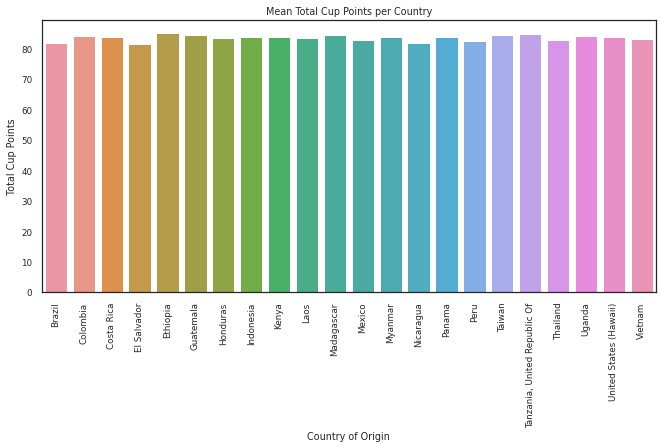

In [238]:
fig = px.choropleth(country_total_cup_mean,
                   locations = "Country of Origin",
                   locationmode = "country names",
                   color = "Total Cup Points",
                   hover_name = "Country of Origin",
                   color_continuous_scale = px.colors.sequential.Plasma,
                   title = "Mean Total Cup Points per Country", 
                   )
fig.update_layout(title_x = 0.5)
fig.show()

plt.figure(figsize=(11, 5))
plt.xticks(rotation=90)
sns.barplot(x = country_total_cup_mean["Country of Origin"], y = country_total_cup_mean["Total Cup Points"])
plt.title("Mean Total Cup Points per Country")

In these 2 graphs we can see the mean total cup score per country on a map and on a bar plot. From the map, we can see that the best coffee quality comes from east African countries, with Ethiopia producing the best coffee in the world (on average)

Text(0.5, 1.0, 'Average Coffee Age in Days per Country - Barplot')

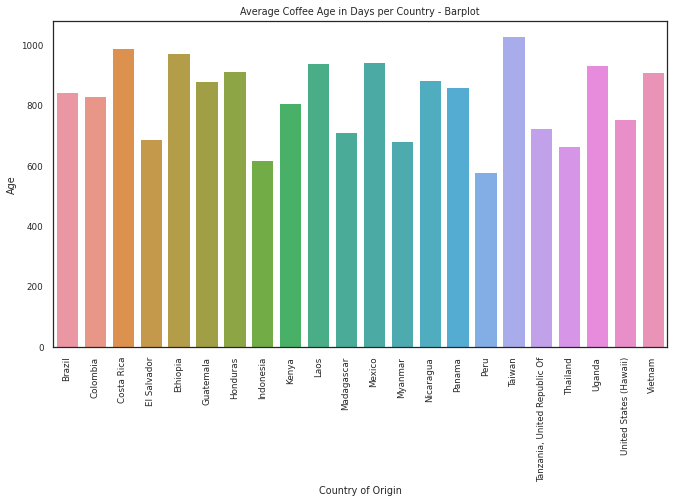

In [239]:
coffee["Age"] = (coffee["Expiration"] - coffee["Harvest Year"]).dt.days
coffee_age = coffee.groupby("Country of Origin")["Age"].mean().reset_index()

fig = px.choropleth(coffee_age,
                   locations="Country of Origin",
                   locationmode="country names",
                   color = "Age",
                   hover_name="Country of Origin",
                   title = "Average Coffee Age in Days per Country")

fig.update_layout(title_x = 0.5)
fig.show()


plt.figure(figsize=(11, 6))
plt.xticks(rotation = 90)
sns.barplot(x = coffee_age["Country of Origin"], y = coffee_age["Age"])
plt.title("Average Coffee Age in Days per Country - Barplot")

## Dealing with the Input Variables

### Creating dummy variables

In [240]:
#Categorical variables need to be converted to numbers in order to be processed - this can be done by creating dummy 
#variables (0 - 1)

df = coffee.copy()
categorical_columns = ["Processing Method"]
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity',
       'Overall', 'Total Cup Points', 'Moisture Percentage',
       'Category One Defects', 'Quakers', 'Category Two Defects',
       'Age']
columns_to_drop = ['Country of Origin', 'Owner', 'Variety',
       'Status', 'Color', "Harvest Year", "Expiration", 'Clean Cup', 'Sweetness']

df.drop(columns_to_drop, axis = 1, inplace = True)
dummy_variables = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

### Scaling Numerical Variables

In [241]:
scaler = StandardScaler()

scaled_numerical = scaler.fit_transform(df[numerical_columns])

scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

### Creating df with scaled numerical variables and dummy variables

In [242]:
dummy_variables = dummy_variables.drop(numerical_columns, axis = 1)

df_prep = pd.concat([scaled_numerical_df, dummy_variables], axis = 1)

In [243]:
df_prep[df_prep["Altitude"] != "nan"]

,Altitude,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects,Age,Processing Method_Natural / Dry,Processing Method_Pulped natural / honey,Processing Method_Washed / Wet
0,0.699217,2.993534,2.707661,2.980060,3.436732,2.614819,3.034825,0.093753,2.955285,3.257632,0.855585,-0.229016,-0.410510,0.254427,0.425286,0,0,1
1,-0.155245,2.714721,2.707661,1.163485,1.196334,1.198113,2.369929,0.093753,2.693520,2.243864,-0.189052,-0.229016,-0.410510,-0.764924,0.660522,0,0,1
2,-0.016308,2.122244,2.420858,1.744789,1.853003,1.198113,2.057037,0.093753,2.137270,2.151176,-0.269408,-0.229016,-0.410510,-0.085356,0.660522,0,0,1
3,0.817313,1.250954,1.524596,2.071773,2.162023,2.271375,1.705034,0.093753,1.875506,2.006352,0.855585,-0.229016,-0.410510,-0.764924,-1.135830,0,0,1
4,0.921516,2.122244,2.098204,1.744789,2.162023,1.198113,1.079250,0.093753,1.875506,1.954216,0.694872,-0.229016,0.777959,-0.085356,-0.425843,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-0.502587,-1.920542,-2.060448,-2.469664,-2.009752,-0.948411,-1.854111,0.093753,-1.952802,-2.100859,0.534158,-0.229016,-0.410510,0.594211,-0.562708,0,0,1
203,-0.155245,-1.362917,-2.383102,-3.087299,-2.009752,-0.948411,-1.854111,0.093753,-1.952802,-2.147202,-0.269408,-0.229016,0.777959,3.312481,-0.438675,0,0,1
204,-0.016308,-1.641729,-2.060448,-1.888360,-2.666420,-2.408048,-2.206115,0.093753,-2.214567,-2.338370,0.694872,-0.229016,4.937598,2.972698,0.643414,0,0,1
205,-0.155245,-4.255600,-3.566167,-3.087299,-2.009752,-2.408048,-2.519006,0.093753,-2.770817,-3.259451,0.212732,-0.229016,6.720300,3.652265,-1.978405,0,0,1


In [244]:
df_prep.dropna(inplace = True)

In [245]:
df_prep.isnull().sum()

Altitude                                    0
Aroma                                       0
Flavor                                      0
Aftertaste                                  0
Acidity                                     0
Body                                        0
Balance                                     0
Uniformity                                  0
Overall                                     0
Total Cup Points                            0
Moisture Percentage                         0
Category One Defects                        0
Quakers                                     0
Category Two Defects                        0
Age                                         0
Processing Method_Natural / Dry             0
Processing Method_Pulped natural / honey    0
Processing Method_Washed / Wet              0
dtype: int64

In [246]:
null_values = df_prep[df_prep.isnull().any(axis=1)]

# Print the rows with null values
print(null_values)

Empty DataFrame
Columns: [Altitude, Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Overall, Total Cup Points, Moisture Percentage, Category One Defects, Quakers, Category Two Defects, Age, Processing Method_Natural / Dry, Processing Method_Pulped natural / honey, Processing Method_Washed / Wet]
Index: []


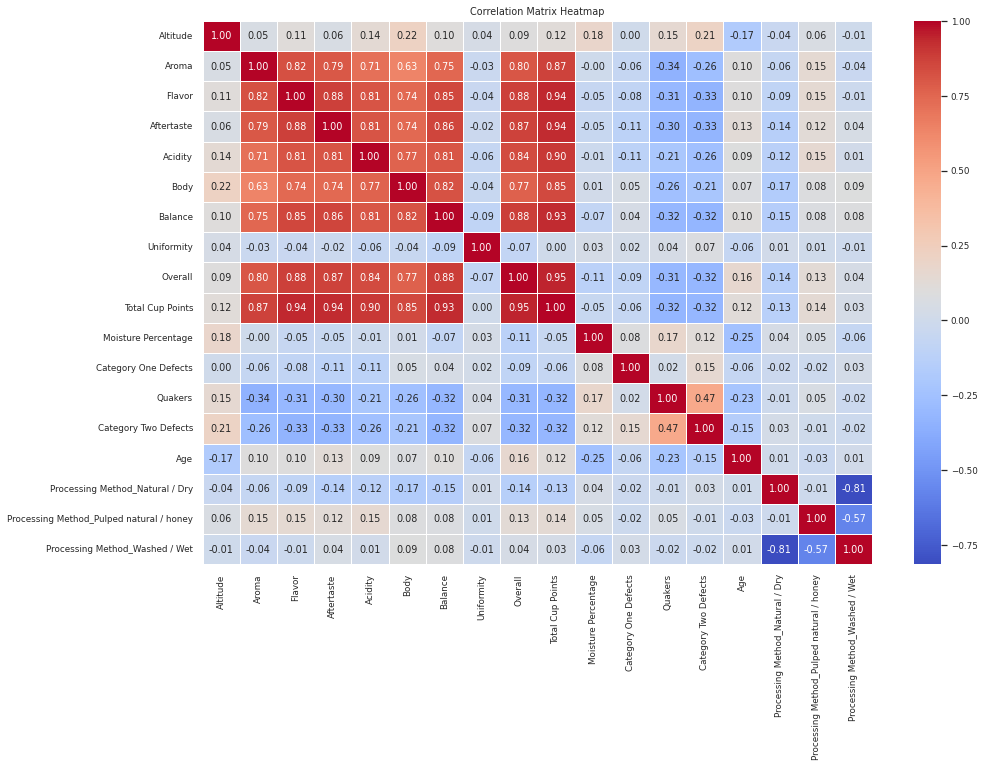

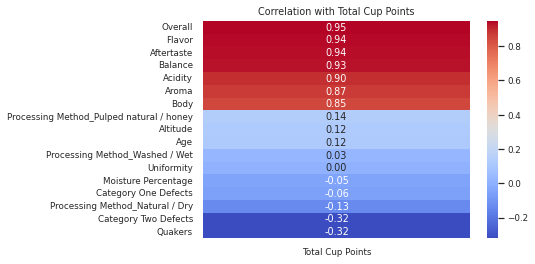

In [247]:
corr_matrix = df_prep.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr_matrix_sorted = corr_matrix['Total Cup Points'].drop('Total Cup Points')

corr_matrix_sorted = corr_matrix_sorted.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(corr_matrix_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Total Cup Points')
plt.show()

It seems that the most strongly correlated variables are [overall, flavor, aftertaste, balance, acidity, aroma and body], meaning that when these variables increase, the total cup points variable also increases. However, it does not necessarily mean that these input variable have a casual relationship with the target variable

In [257]:
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
                     'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage',
                     'Category One Defects', 'Quakers', 'Category Two Defects', 'Age']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), [col for col in numerical_columns if col != 'Total Cup Points'])])
# Append classifier to preprocessing pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestRegressor(n_estimators=50, random_state=42))])

# Split the data into train and test sets
X = df_prep.drop('Total Cup Points', axis=1)
y = df_prep['Total Cup Points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [258]:
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.03460648237640896
